In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

## Analysis tools

In [4]:
import sys; sys.path.append("../../offline/")
import sparse, geom, utils

## Path to data, aux  and geometry files

In [5]:
path_to_data = "../../data/sparse/" # scratch/sparse on Maxwell
path_to_aux = "../../data/aux/" # scratch/benedikt/aux on Maxwell
path_to_geometry = "../../geometry/"

## Select run

In [6]:
run = 570

## Parse small data from sparse HDF5 file

In [7]:
with sparse.Run(path_to_data + "r%04d.h5" %run) as r:
    cells = r.cellIds
    score = r.litpixel

## Define good cells

In [8]:
goodcells = np.ones(len(cells), dtype=np.bool)
goodcells[cells == 0] = False
goodcells[cells >= 142] = False

## Select interesting shot

In [10]:
strongest = np.argsort(score)[::-1][0]

## Extract modules

In [11]:
with sparse.Frame(path_to_data + "r%04d.h5" %run) as f:
    modules = np.float64(f.modules(strongest))
print(modules.shape)

(16, 128, 512)


## Extract assembled image

In [13]:
with sparse.Frame(path_to_data + "r%04d.h5" %run, geometry=path_to_geometry + "b1.geom", goodmask=None) as f:
    img = np.float64(f.assembled(strongest))
    msk = (f.activepixels & f.goodpixels)

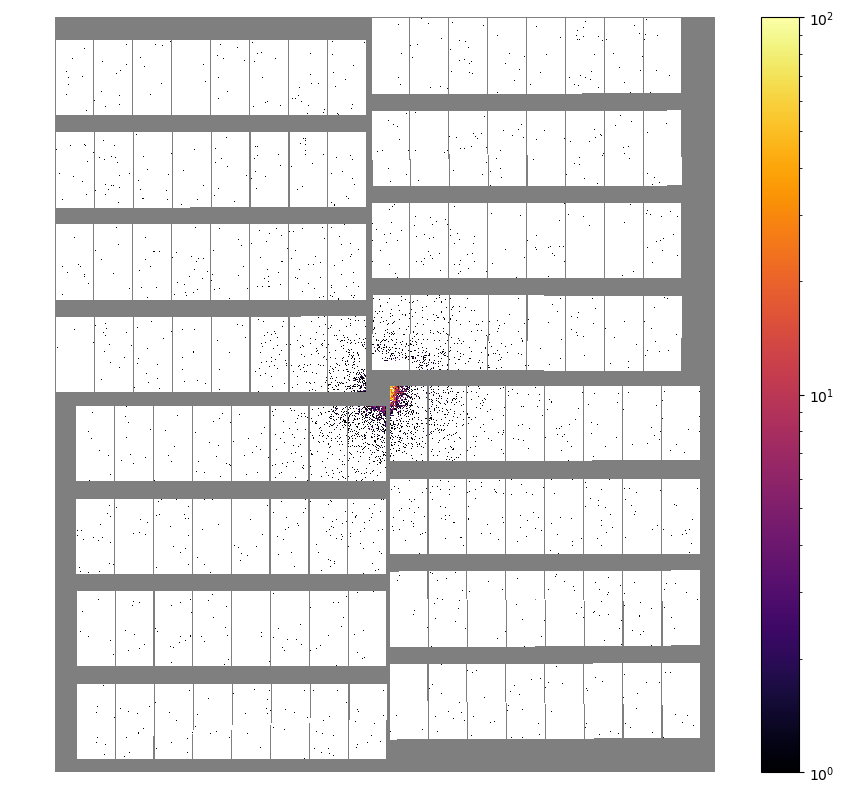

In [14]:
mimg = np.ma.masked_array(img, mask=~msk)
mimg.data[mimg.data==0] = 1e-10
cmap = cm.get_cmap('inferno')
cmap.set_bad('0.5')
cmap.set_under('1.0')
plt.figure(figsize=(12,10), dpi=100)
plt.axis('off')
plt.imshow(mimg, norm=colors.LogNorm(vmin=1, vmax=100), cmap=cmap)
plt.colorbar()
plt.show()